# Step response of a first order linear system

The system is given by the differential equation
$$ T\dot{y} + y = u. $$
which on transfer function form is
$$ Y(s) = \frac{1}{sT + 1} U(s). $$
The single parameter \(t\) is called the *time constant* of the system. It has unit /time/, as the name suggests, and tells us how fast the system is.

There is a single pole in $s= -\frac{1}{T}. $ Let's look at how the step response depends on the time constant.

In [1]:
using Interact
using ControlSystems
using Gadfly

    +(AbstractArray, DataArrays.DataArray) at /home/kjartan/.julia/v0.4/DataArrays/src/operators.jl:276
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /home/kjartan/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.DataArray{T<:Any, 2})
before the new definition.
    +(AbstractArray, DataArrays.AbstractDataArray) at /home/kjartan/.julia/v0.4/DataArrays/src/operators.jl:300
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /home/kjartan/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.AbstractDataArray{T<:Any, 2})
before the new definition.


Interact.Slider{Float64}(Signal{Float64}(5.0, nactions=0),"T",5.0,0.1:0.1:10.0,".3f",true)

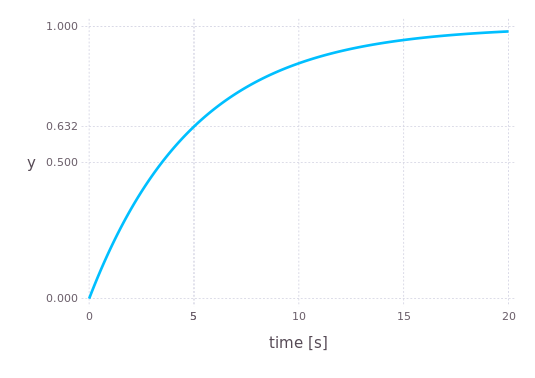

In [3]:
N = 600; # Number of samples

t = collect(linspace(0, 20, N)); # 60 values per second 

# The input step
u = ones(N);

@manipulate for T in 0.1:0.1:10
    G = tf([1], [T, 1.0]);
    yr, t_out, x = lsim(G, u, t);
    stp = plot(x=t, y=yr, Geom.line, style(line_width=2pt),
            Guide.xlabel("time [s]"), Guide.ylabel("y"),
            Guide.xticks(ticks=sort!(push!([0.,5.,10.,15.,20.], T))),
            Guide.yticks(ticks=[0.,0.5, 0.632, 1.0])
    
    )
end

In [5]:
T = 2;
G = tf([1], [T, 1.0]);
yr, t_out, x = lsim(G, u, t);
stp = plot(x=t, y=yr, Geom.line, 
            Guide.xlabel("time [s]"), Guide.ylabel("y"),
            Guide.xticks(ticks=sort!(push!([0.,5.,10.,15.,20.], T))),
            Guide.yticks(ticks=[0.,0.5, 0.632, 1.0])
    
    )
draw(PDF("first-order-step.pdf", 5inch, 3inch), stp)